In [ ]:
요즘 데이터 분석하는데 부스팅이 핫함.
특히 decision tree 계열로 부스팅 하는 것이 인기가 있음.
의사결정 나무는 깊이가 깊으면 오버피팅 생길수도.

In [ ]:
부스팅은 약한 애를 단점을 보완하면서 강하게 만드는 것.
가면 갈수록 틀린 애한테 가중치 주면서 연속적으로 계속 만들어가는 것. 성능이 좋을수밖에 없음.
그러나, 특정 데이터만 보면 오버피팅을 걸림. 그래서 부스팅은 오버피팅이 많이 걸리는 테크닉이었음. 그래서 거의 잘 사용x
중간중간 만들었던 모델들의 평균을 잡아서 오버피팅 극복 -> 90년대

In [ ]:
얘들의 변형판들이 나오기 시작함.
AdaBoost 가 유일하게 성공.
weight를 처음에 다 똑같게 초기화함. 전체 개수로 나누는 것.
모델을 M 번 순차적으로 만듦. loss func의 weight 가 커지도록 바꿈. 잘 안되는 애들은 계속 강화시킴.

In [ ]:
부스팅은 weight 들을 조절해서 약한애를 결국 강하게 만듦. 약한 애 선택을 어떻게 하느냐?!
트리를 성능좋게 점점 키워가면서 만드는 것이 요즘에 사용하는 부스팅 테크닉.

In [ ]:
gradient boosting ; 경사하강법 이용.
부스팅은 성능을 확실히 올려준다는 보장이 있음.

In [2]:
# 구현
# 배깅부터 구현해보자
# 배깅은 부트스트래핑 어그리게이션
# 카테고리에서는 보팅, 연속 데이터에서는 평균
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')

In [4]:
from sklearn.ensemble import BaggingClassifier
# 트리와 배깅이 합쳐져서 랜덤 포레스트가 됨.

In [4]:
bc = BaggingClassifier()  # estimator 안 넣으면 decision tree. 그리고 10개 만듦

# Init signature:
# BaggingClassifier(
#     estimator=None,
#     n_estimators=10,
#     *,
#     max_samples=1.0,
#     max_features=1.0,
#     bootstrap=True,
#     bootstrap_features=False,
#     oob_score=False,
#     warm_start=False,
#     n_jobs=None,
#     random_state=None,
#     verbose=0,
#     base_estimator='deprecated',
# )

# estimator : object, default=None
#     The base estimator to fit on random subsets of the dataset.
#     If None, then the base estimator is a
#     :class:`~sklearn.tree.DecisionTreeClassifier`.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.species)

In [7]:
bc.fit(X_train, y_train)

BaggingClassifier()

In [ ]:
# 배깅은 모델은 평균잡거나, 보팅함. 그래서 편차를 줄이는 효과가 있음. stable 하게 만드는 효과가 있음.
# Bagging() 안에 우리가 만든 모델 넣을 수도 있음 => 즉 우리가 만든 모델이 오버피팅할 위험이 있다면 배깅 안에 넣을 수 있음.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
bc = BaggingClassifier(KNeighborsClassifier())

In [10]:
bc.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier())

In [ ]:
# 부스팅은 성격이 좀 다름
# 부스팅의 큰 개념은 잘 안되는 것에 가중치를 둬서 강화시키는 것.
# 90년대 나온 Adaboosting 같은 것.
# 안되는 애들 강화시켜서 나중에 전체 다시 평균
# 배깅은 순차적이 아니라 동시에.
# 부스팅은 관련성을 둬서 순차적으로 함. 그러나 나중에는 똑같이 평균 내거나 랭킹을 해서 결과를 냄.
# 부스팅은 데이터도 다른 거 사용하는데 웨이트가 달라지니까 모델도 점점 달라지는 것.

In [ ]:
# 정형데이터에서 부스팅계열이 매우 잘됨.

In [11]:
!pip install -U xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [12]:
import xgboost

In [14]:
'sklearn' in dir(xgboost)

True

In [15]:
from xgboost.sklearn import XGBClassifier, XGBRegressor

In [ ]:
# xgb 는 gpu 연산이 됨.
# gradient descent

In [16]:
!pip install -U tpot
# 유전자 알고리즘 이용

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 6.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=2824109b98cc4e556ec165a5202b8d66b665ff62e132f64e7ba2fd08d87248cc
  Stored in directory: /Users/baekkwanghyun/Library/Caches/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [17]:
from tpot import TPOTClassifier

In [18]:
tp = TPOTClassifier(10, 10)

In [19]:
tp.fit(X_train, y_train)
# 자동으로 sklearn의 조합으로 나올 수 있는 데이터 전처리 등을 자동으로 찾아줌.
# 또한 코드로 짠! 하고 나오게 해주는 것도 있음.

TPOTClassifier(generations=10, population_size=10)

In [20]:
dir(tp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_operators',
 '_add_terminals',
 '_check_dataset',
 '_check_feature_names',
 '_check_n_features',
 '_check_periodic_pipeline',
 '_cleanup_memory',
 '_combine_individual_stats',
 '_compile_to_sklearn',
 '_config_dict',
 '_create_periodic_checkpoint_folder',
 '_evaluate_individuals',
 '_exported_pipeline_text',
 '_fit_init',
 '_fitted_imputer',
 '_gen_grow_safe',
 '_generate',
 '_get_make_pipeline_func',
 '_get_param_names',
 '_get_tags',
 '_import_hash',
 '_import_hash_and_add_terminals',
 '_impute_values',
 '_imputed',
 '_init_pretest',
 '_lambda',
 '_last_optimized_pareto_front',
 '

In [21]:
tp.export('star')

In [ ]:
# xgboosting 도 gridsearch 됨.

In [ ]:
dir(lightgbm)

In [5]:
from sklearn import ensemble

In [6]:
[x for x in dir(ensemble) if 'Boost' in x]

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor']

In [ ]:
# tree 는 어떻게 구조를 만드는가에 따라서 성능이 완전 바뀜. 구조를 만드는 것.
# 딥러닝 모델들 앙상블로 성능 극대화시킬 수 있음.
# 부스팅과 짝지인데 기법이 다른 애가 또 있음.
# stacking
# cv 해서 나온 예측값을 모델별로 모아서 그걸 가지고 또 새로운 모델을 만드는 것.
# 즉 예측값 자체가 학습데이터가 되어서 모델이 쌓인 것처럼 보임(stacking)
# 이 모델의 장점은 성능 면에서 짱이다. 단점은 만드는데 굉장히 복잡함. 예측도 해야하고 예측한 걸로 또 만들어야 하니까 데이터 많이 필요하고.
# 스택이 많이 쌓이면 쌓일수록 더 성능 좋음. -> 캐글 블로그(no free hunch) 에 보면 stacking 과 xgboosting 으로 1등이 제일 많음.
# 스태킹은 성능 정체될 때 정말 좋음. 그러나 데이터가 많아야 함.

# blending 은 3-way hold-out.

In [6]:
# stacking 구현
from sklearn.ensemble import StackingClassifier
# 데이터의 힘이 크기 때문에 전처리를 했는데, 성능이 안나오면 그 때 앙상블에 들어가는 것.

In [ ]:
StackingClassifier()

# Init signature:
# StackingClassifier(
#     estimators,
#     final_estimator=None,
#     *,
#     cv=None,
#     stack_method='auto',
#     n_jobs=None,
#     passthrough=False,
#     verbose=0,
# )

# sklearn 의 또 다른 장점은 out-of-box ; 꺼내면 바로 쓸 수 있다.
# 옵션을 안줘도 되는 애들이 많음.
# 태생적으로 NN 자체를 stacking

In [5]:
import lightgbm

### 딥러닝 시작

In [ ]:
# 퍼셉트론에서 가중치 찾기
# y = x1w1 + x2w2 + bias  => 이게 퍼셉트론 식
# 처음에는 수동으로 찾음
# 퍼셉트론은 and, or 연산 다 가능함. => 퍼셉트론이 w와 b에 따라서 and와 or을 흉내낼 수 있다는 것.
# 머신러닝은 일반화된 것으로 특정한 것을 해결함.
# linear model 임

# 0보다 클 때는 활성화, 0보다 작을 때는 활성화x

In [ ]:
# layer 를 stacking => multi layer perceptron 으로 XOR problem 을 풀어버림.
# multi layer perceptron 을 바로 딥러닝이라고 함.

In [ ]:
# 모델은 현실세계를 단순화한 것. 수식하나로 표현하기 때문. 가정을 많이 하면 할수록 성능이 좋아질 수 있음.

In [ ]:
# 컴퓨터 뉴런은 입력을 여러개 받으면, 입력이 가중치(전달되는 양)와 곱해져서 합을 함.
# 그리고 뉴런마다 자신만의 bias 가 있음. 어떤 애는 조금만 자극을 줘도 활성화.
# 그 자극의 정도에 따라 다음으로 자극이 전달될지 안될지를 수학적으로 표현한 것이 뉴런.

In [ ]:
# 현실세계를 다 반영할 수 없기 때문에 가정을 시작함.
# 모델링의 방법은 수식도 있지만 다이어그램 이해하는 것이 중요함

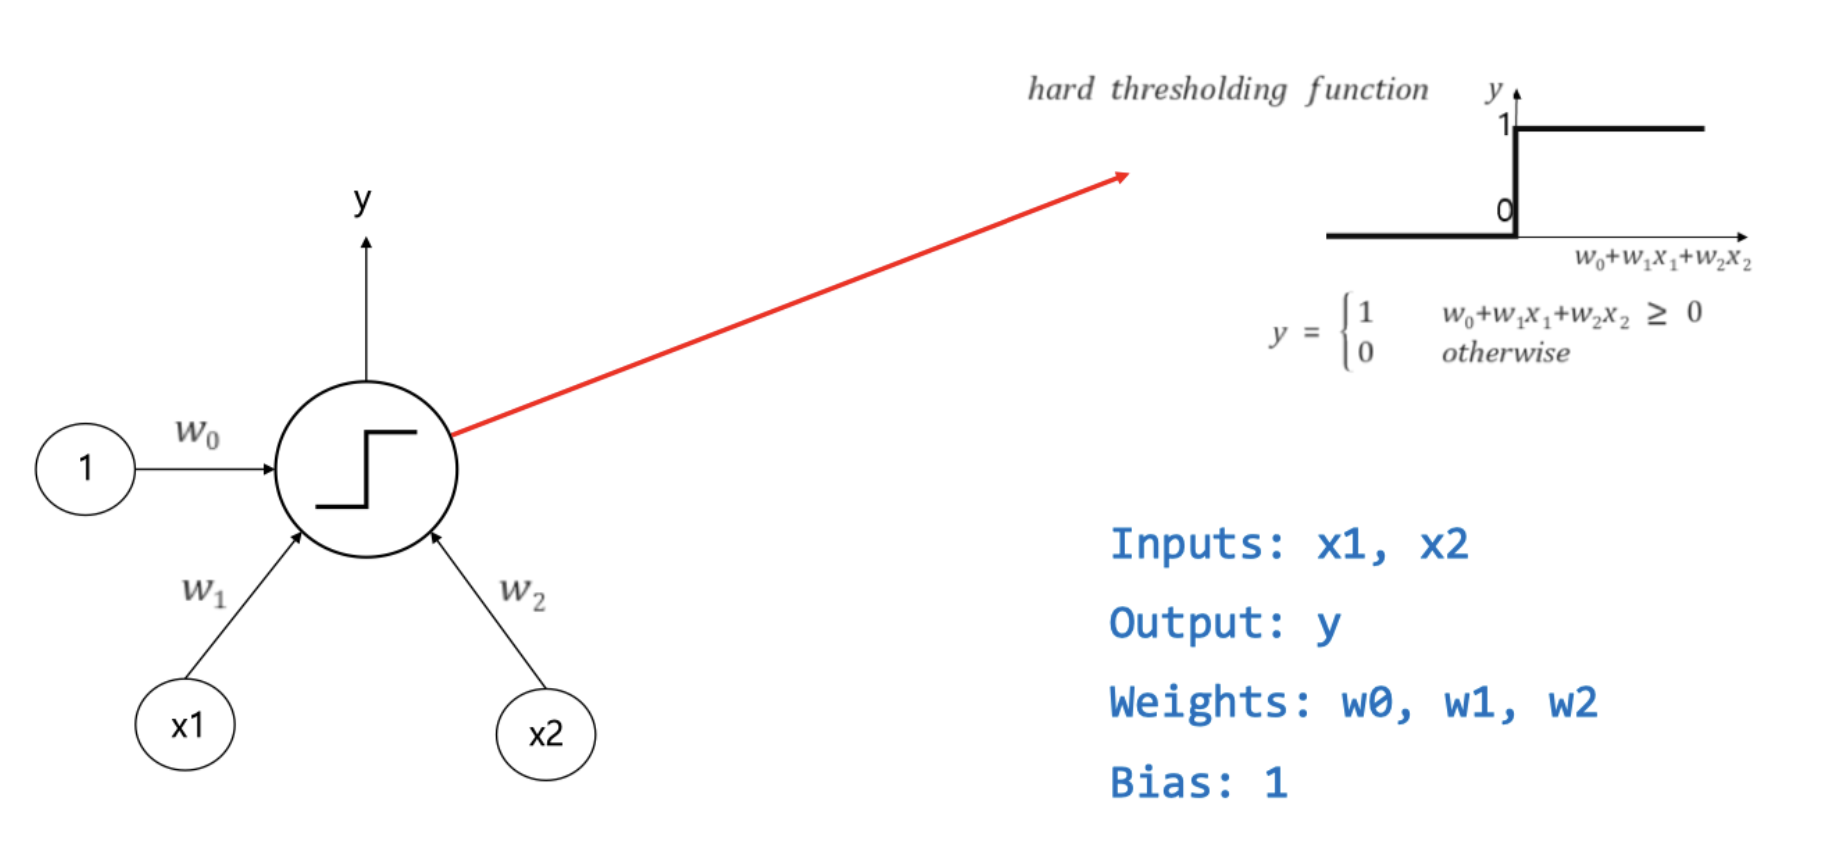

In [ ]:
# 위에서 bias가 1W0. 왜 이런식으로 표현? => matrix 로 만들기 위해서.
# 위가 기본적인 퍼셉트론 모델.

In [ ]:
# linear_model 은 왜이렇게 모델이 많을까?
from sklearn.linear_model import 
# ax+b 에서 a와 b를 찾는 방법이 다르기 떄문.
# 이것 때문에 알고리즘 방식이 다르고 성능 차이도 있음.
# 직선을 찾는 것. 계수와 절편 찾는 것.

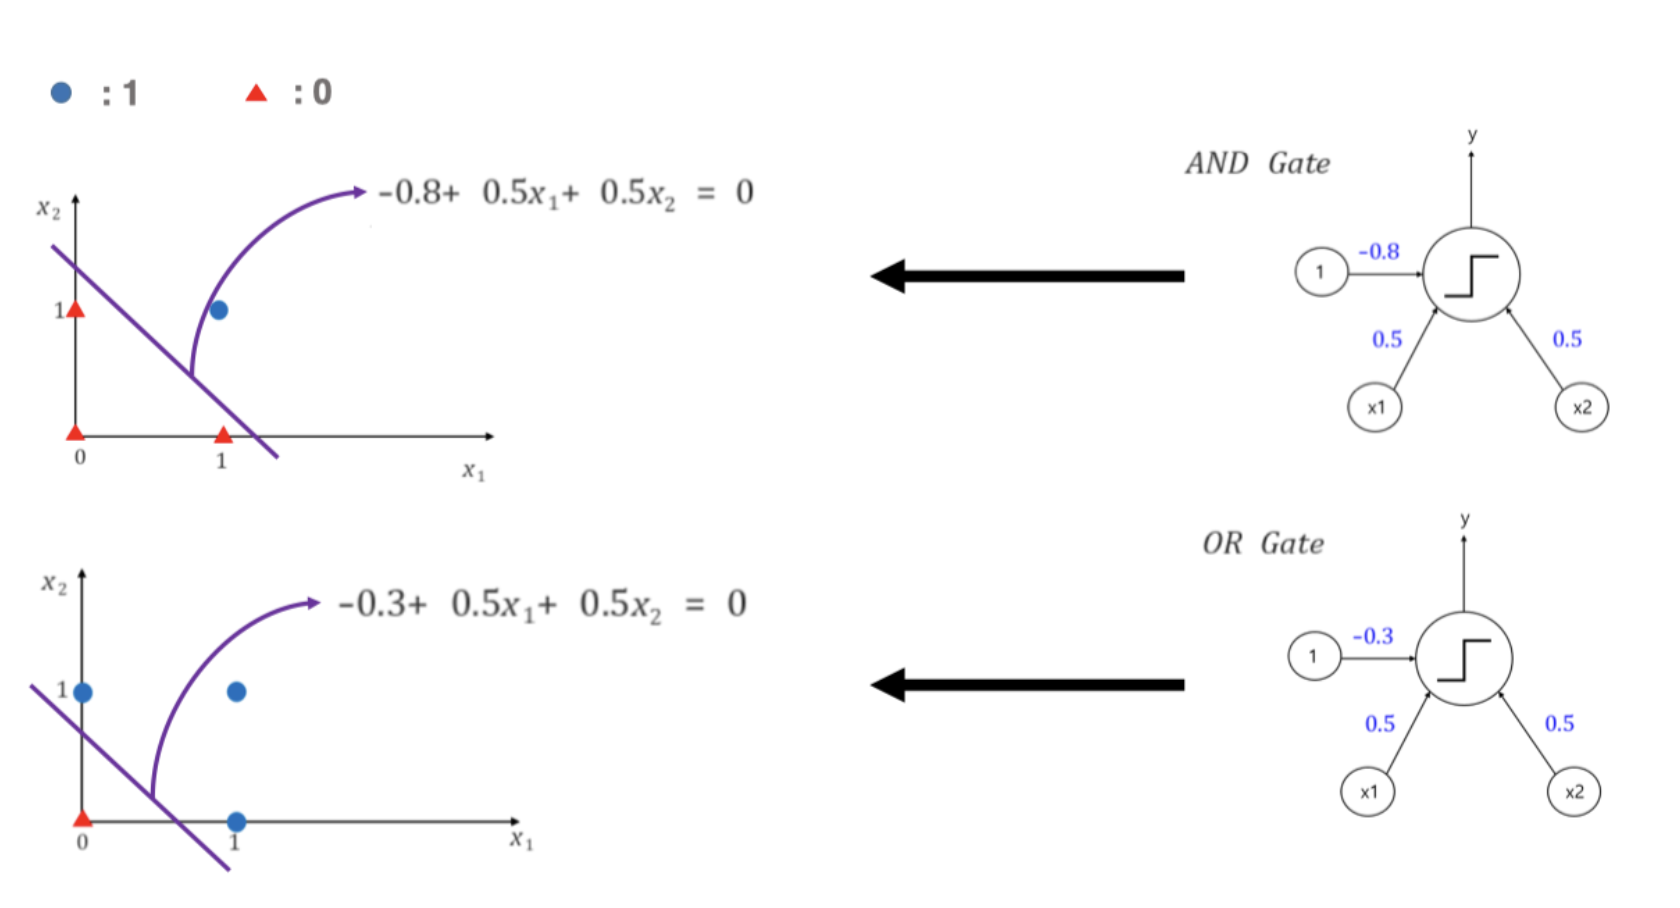

In [ ]:
# 같은 선형이라고 해도 찾는 방법에 따라서 달라짐.  방식이 5개나 있음
# gradient descent
# 뉴턴 방정식 등등
# 데이터로부터 w와 b를 찾음

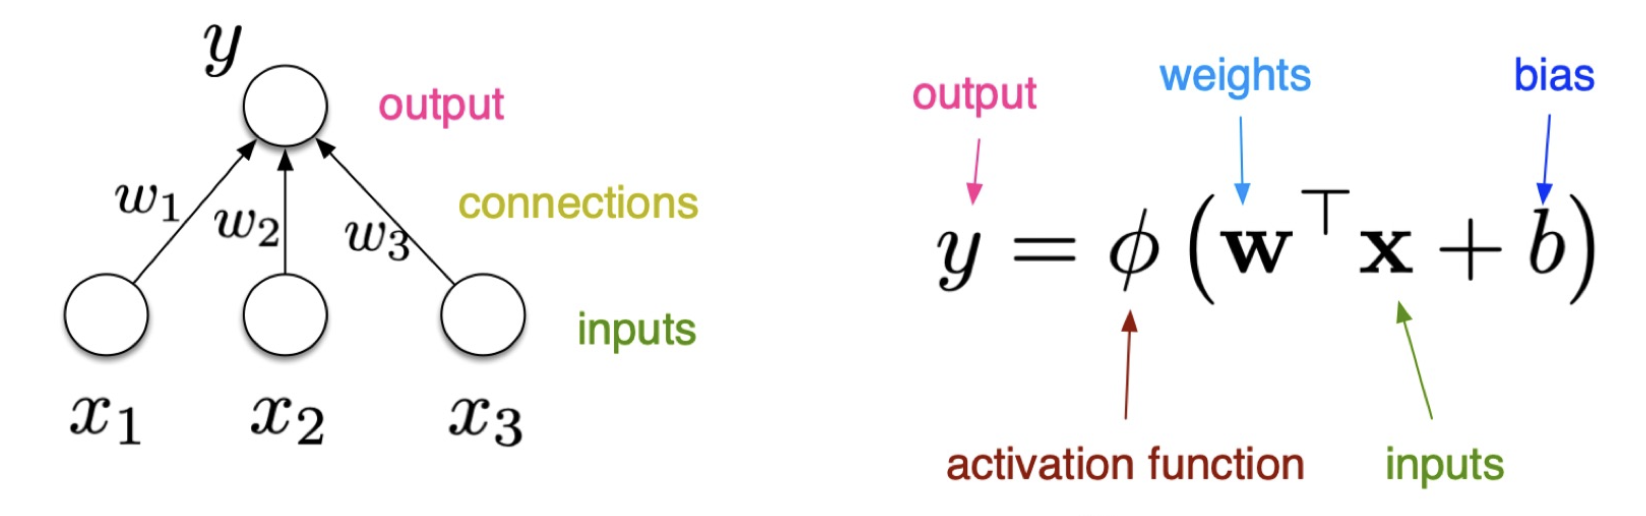

In [ ]:
# 딥러닝은 합성함수다! 활성화함수(일차함수)
# 일차식 계산 한 것을 활성함수에 넣어서 0보다 크면 전달, 0보다 작으면 전달x
# 위 두가지가 퍼셉트론.
# 파라미터릭 러닝인데, 찾는 방법이 알고리즘마다 다름.
# 퍼셉트론 알고리즘은 => 러프하게 이야기했을 때, perceptron learning rule = Delta rule
# 차이에 의해서, 차이를 줄여가면서 w와 b를 찾는 방식이 퍼셉트론 러닝 룰.

# 이 전에 Hebb's rule 이 있었음.
# 가중치가 크면 더 중요한 역할을 한다고 볼 수 있음. 중요한 애들만 활성화가 동시에 된다는 것.
# 중요한 것은 weight 가 커지는 것. 이 아이디어를 가지고 학습을 함.